In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd 
import os 
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
os.chdir('D://')
import soundfile as sf
x, sr = librosa.load("/Audio_Data/RavdessData/Actor_01/03-01-01-01-01-01-01.wav")
sf.write("Test.wav", x, sr)
Audio(data=x,rate=sr)


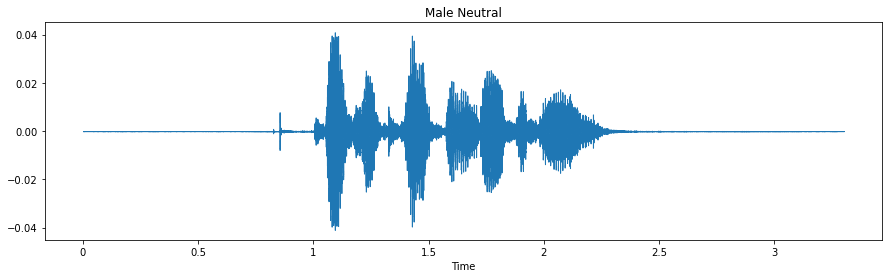

In [ ]:
plt.figure(figsize=(15, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Male Neutral')
plt.savefig('MaleNeutral.png')

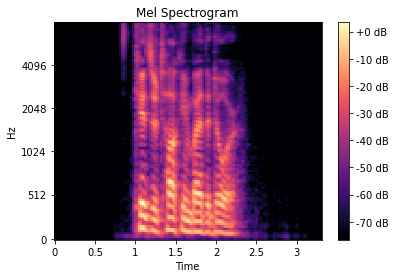

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram')
plt.savefig('MelSpec.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
emotion = []
gender = []
actor = []
file_path = []
count=-1
actors_folder='Audio_Data/RavdessData'
for i in os.listdir(actors_folder):
    print(i)
    filename = os.listdir('Audio_Data/RavdessData/'+i)
    for f in filename: 
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append('Audio_Data/RavdessData/' +i+ '/' + f)
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.head()
    

Actor_01
Actor_02
Actor_03
Actor_04
Actor_05
Actor_06
Actor_07
Actor_08
Actor_09
Actor_10
Actor_11
Actor_12
Actor_13
Actor_14
Actor_15
Actor_16
Actor_17
Actor_18
Actor_19
Actor_20
Actor_21
Actor_22
Actor_23
Actor_24


,gender,emotion,actor,path
0,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...
1,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...
2,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...
3,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...
4,male,calm,1,Audio_Data/RavdessData/Actor_01/03-01-02-01-01...


In [ ]:
df = pd.DataFrame(columns=['mel_spectrogram'])
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec, axis = 0)
    df.loc[counter] = [log_spectrogram]
    counter=counter+1
print(len(df))
sd=df.head()
final_audio_df=pd.concat([audio_df,df],axis=1)

1440


In [ ]:
final_audio_df

,gender,emotion,actor,path,mel_spectrogram
0,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...,"[-76.38517, -76.38517, -76.38517, -76.38517, -..."
1,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...,"[-75.48293, -75.4404, -75.554375, -75.20429, -..."
2,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...,"[-75.15079, -75.15079, -75.15079, -75.15079, -..."
3,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...,"[-75.268524, -75.268524, -75.268524, -75.26852..."
4,male,calm,1,Audio_Data/RavdessData/Actor_01/03-01-02-01-01...,"[-80.14777, -80.14777, -80.14777, -80.14777, -..."
...,...,...,...,...,...
1435,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-01-02...,"[-66.86136, -66.86136, -64.904015, -64.66387, ..."
1436,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-01...,"[-62.38528, -62.38528, -62.38528, -62.38528, -..."
1437,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-01...,"[-65.51562, -65.51562, -65.51562, -65.51562, -..."
1438,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-02...,"[-63.501495, -63.501495, -63.421318, -62.7508,..."


In [ ]:
final_audio_df= pd.concat([audio_df,pd.DataFrame(df['mel_spectrogram'].values.tolist())],axis=1)
final_audio_df= final_audio_df.fillna(0)
final_audio_df

,gender,emotion,actor,path,0,1,2,3,4,5,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-01...,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,Audio_Data/RavdessData/Actor_01/03-01-01-01-02...,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,Audio_Data/RavdessData/Actor_01/03-01-02-01-01...,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,...,-80.147774,-80.147774,-80.122353,-79.998413,-80.119652,-80.147774,-80.130814,-80.015106,-80.147774,-80.147774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-01-02...,-66.861359,-66.861359,-64.904015,-64.663872,-66.493340,-66.080956,...,-66.861359,-66.859650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-01...,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,...,-62.381546,-62.385281,-62.385281,-62.347294,-62.385281,-62.385281,-62.347816,-62.358097,-62.385281,-62.383404
1437,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-01...,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.515366,...,-65.430115,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.503281,-65.504234,-65.491219,-65.437935
1438,female,surprise,24,Audio_Data/RavdessData/Actor_24/03-01-08-02-02...,-63.501495,-63.501495,-63.421318,-62.750801,-59.717041,-55.641850,...,-62.756645,-62.907124,-62.763821,-62.752789,-63.128666,-63.439880,-63.484493,-63.420803,-63.217548,-63.179066


In [ ]:
train,test = train_test_split(final_audio_df, test_size=0.2, random_state=0,
                               stratify=final_audio_df[['emotion','gender','actor']])

In [ ]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 259)


In [ ]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)
final_audio_df

(288, 259)


,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,...,-80.147774,-80.147774,-80.122353,-79.998413,-80.119652,-80.147774,-80.130814,-80.015106,-80.147774,-80.147774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female,surprise,24,-66.861359,-66.861359,-64.904015,-64.663872,-66.493340,-66.080956,-66.156181,...,-66.861359,-66.859650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,female,surprise,24,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,...,-62.381546,-62.385281,-62.385281,-62.347294,-62.385281,-62.385281,-62.347816,-62.358097,-62.385281,-62.383404
1437,female,surprise,24,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.515366,-65.443626,...,-65.430115,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.503281,-65.504234,-65.491219,-65.437935
1438,female,surprise,24,-63.501495,-63.501495,-63.421318,-62.750801,-59.717041,-55.641850,-52.376606,...,-62.756645,-62.907124,-62.763821,-62.752789,-63.128666,-63.439880,-63.484493,-63.420803,-63.217548,-63.179066


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_train
# X_test=X_test.drop(['path'],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
692,1.393350,1.315214,1.306652,1.291733,1.274631,1.259010,1.246324,1.236162,1.217084,1.192113,...,0.088608,0.104945,0.038517,0.035680,-0.054611,-0.042564,-0.034232,-0.143076,-0.144194,-0.102965
472,-0.145607,-0.173679,-0.184437,-0.164506,-0.171392,-0.184306,-0.171839,-0.176069,-0.199900,-0.214037,...,-0.530882,-0.531665,-0.562845,-0.545954,-0.609087,-0.613172,-0.618847,-0.699893,-0.694707,-0.684092
1312,-0.258681,-0.276407,-0.280976,-0.293141,-0.314010,-0.320267,-0.323042,-0.307801,-0.289199,-0.293841,...,-0.593026,-0.589239,-0.621358,-0.619324,-0.677432,-0.675169,-0.672987,-0.742842,-0.745085,-0.744216
1439,1.903985,2.101362,2.042905,1.891029,1.835187,1.852286,1.832893,1.765299,1.641117,1.542116,...,-0.299575,-0.291050,-0.331522,-0.316025,-0.392253,-0.395042,-0.397700,-0.486835,-0.493299,-0.492948
896,0.530569,0.472890,0.481204,0.475501,0.445690,0.443188,0.439411,0.445325,0.419692,0.401505,...,2.094138,2.098041,1.944733,1.948071,1.751582,1.752772,1.753237,1.566371,1.564808,1.560926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,1.024032,1.061281,1.061610,0.963498,0.900860,0.873226,0.860019,0.851962,0.839454,0.820038,...,-0.091475,-0.079755,-0.138688,-0.140725,-0.223333,-0.224308,-0.221015,-0.314935,-0.319996,-0.320108
1107,0.469538,0.111831,-0.232086,-0.231946,-0.230030,-0.249083,-0.257693,-0.251024,-0.253233,-0.259322,...,-0.551542,-0.549017,-0.580979,-0.572061,-0.628348,-0.634287,-0.634658,-0.711806,-0.693371,-0.599650
20,-1.029845,-1.047198,-1.042520,-1.044621,-1.043580,-1.002146,-1.032983,-1.037422,-1.045027,-1.048833,...,-0.890778,-0.888529,-0.907357,-0.905468,-0.948152,-0.945770,-0.943396,-1.000210,-1.002529,-1.001131
605,-1.755180,-1.355025,-1.105623,-1.043318,-1.094445,-1.067880,-0.999397,-0.962868,-0.960954,-1.015831,...,2.094138,2.098041,1.944733,1.948071,1.751582,1.752772,1.753237,1.566371,1.564808,1.560926


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
final_audio_df

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


,gender,emotion,actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,neutral,1,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male,neutral,1,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,neutral,1,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male,neutral,1,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male,calm,1,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,...,-80.147774,-80.147774,-80.122353,-79.998413,-80.119652,-80.147774,-80.130814,-80.015106,-80.147774,-80.147774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,female,surprise,24,-66.861359,-66.861359,-64.904015,-64.663872,-66.493340,-66.080956,-66.156181,...,-66.861359,-66.859650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1436,female,surprise,24,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,-62.385281,...,-62.381546,-62.385281,-62.385281,-62.347294,-62.385281,-62.385281,-62.347816,-62.358097,-62.385281,-62.383404
1437,female,surprise,24,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.515366,-65.443626,...,-65.430115,-65.515617,-65.515617,-65.515617,-65.515617,-65.515617,-65.503281,-65.504234,-65.491219,-65.437935
1438,female,surprise,24,-63.501495,-63.501495,-63.421318,-62.750801,-59.717041,-55.641850,-52.376606,...,-62.756645,-62.907124,-62.763821,-62.752789,-63.128666,-63.439880,-63.484493,-63.420803,-63.217548,-63.179066


In [ ]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.052083333333333336

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.3229166666666667

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 250, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 241, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 30, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 21, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

In [ ]:
import tensorflow.keras as keras
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)
model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/40
35/36 [============================>.] - ETA: 0s - loss: 2.5326 - accuracy: 0.2152
Epoch 1: val_accuracy improved from -inf to 0.28125, saving model to best_initial_model.hdf5
36/36 [==============================] - 3s 45ms/step - loss: 2.5231 - accuracy: 0.2170 - val_loss: 2.1663 - val_accuracy: 0.2812
Epoch 2/40
35/36 [============================>.] - ETA: 0s - loss: 2.0730 - accuracy: 0.2545
Epoch 2: val_accuracy improved from 0.28125 to 0.31597, saving model to best_initial_model.hdf5
36/36 [==============================] - 1s 35ms/step - loss: 2.0702 - accuracy: 0.2543 - val_loss: 1.9003 - val_accuracy: 0.3160
Epoch 3/40
35/36 [============================>.] - ETA: 0s - loss: 1.8979 - accuracy: 0.2911
Epoch 3: val_accuracy improved from 0.31597 to 0.33333, saving model to best_initial_model.hdf5
36/36 [==============================] - 1s 35ms/step - loss: 1.8992 - accuracy: 0.2908 - val_loss: 1.7865 - val_accuracy: 0.3333
Epoch 4/40
35/36 [=========================

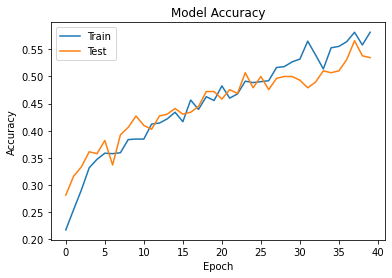

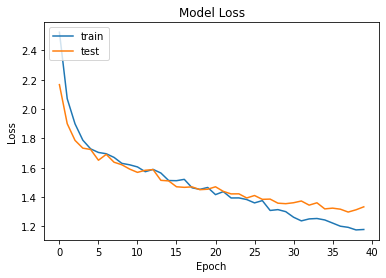

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 12ms/step - loss: 1.3340 - accuracy: 0.5347
Loss of the model is -  1.3339524269104004
9/9 [==============================] - 0s 14ms/step - loss: 1.3340 - accuracy: 0.5347
Accuracy of the model is -  53.47222089767456 %


In [ ]:
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})
finaldf = actual.join(predictions)
finaldf[140:150]

9/9 [==============================] - 0s 12ms/step


,Actual Values,Predicted Values
140,happy,surprise
141,sad,sad
142,fear,fear
143,happy,happy
144,sad,sad
145,fear,fear
146,happy,angry
147,calm,neutral
148,disgust,disgust
149,calm,neutral


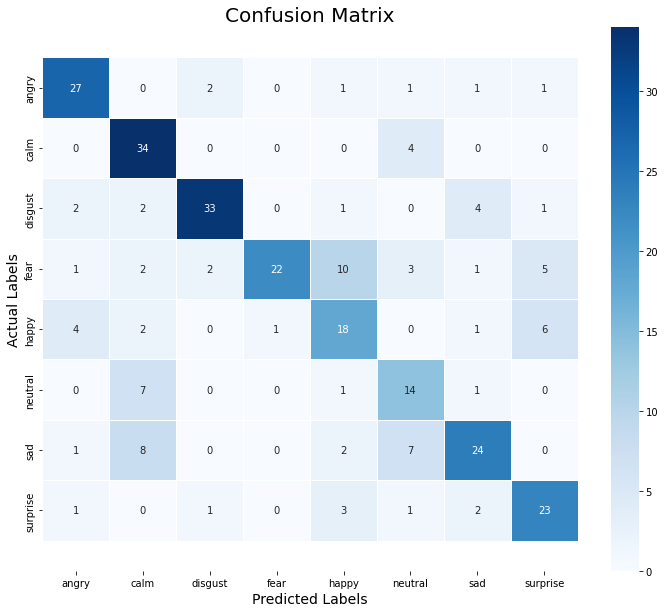

In [ ]:
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [ ]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.75      0.82      0.78        33
        calm       0.62      0.89      0.73        38
     disgust       0.87      0.77      0.81        43
        fear       0.96      0.48      0.64        46
       happy       0.50      0.56      0.53        32
     neutral       0.47      0.61      0.53        23
         sad       0.71      0.57      0.63        42
    surprise       0.64      0.74      0.69        31

    accuracy                           0.68       288
   macro avg       0.69      0.68      0.67       288
weighted avg       0.71      0.68      0.68       288



In [ ]:
train,test = train_test_split(final_audio_df, test_size=0.2, random_state=0,
                               stratify=final_audio_df[['gender','actor']])
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [ ]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [ ]:
from keras.utils import np_utils, to_categorical
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

In [ ]:
y_trainHot=np.argmax(y_train, axis=1)
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75,100],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

36/36 [==============================] - 6s 91ms/step - loss: 2.8783 - accuracy: 0.1554


In [ ]:
grid_search.best_params_

{'batch_size': 32, 'nb_epoch': 50, 'optimizer': 'SGD'}

In [ ]:
from sklearn import svm
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','relu','linear','bpn']
},cv=5,return_train_score=False)

clf.fit(X_train,y_trainHot)
df=pd.DataFrame(clf.cv_results_)

In [ ]:
clf.best_params_ 

{'C': 1, 'kernel': 'rbf'}

In [ ]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 12ms/step - loss: 1.0184 - accuracy: 0.6771
Loss of the model is -  1.018438458442688
9/9 [==============================] - 0s 12ms/step - loss: 1.0184 - accuracy: 0.6771
Accuracy of the model is -  67.70833134651184 %
